# Pattern Recognition 2019 - 2020
## Analytical Exercises Set 2
#### Christos Lamprakos, 03002910

### Exercise 2.2
As a first step, the data was downloaded. Then ```numpy loadtxt``` was used to read the features and corresponding labels in Numpy arrays.

In [1]:
import numpy as np

features = np.loadtxt ('PCA.data', delimiter = ',', usecols = (0, 1, 2, 3))
labels = np.loadtxt ('PCA.data', delimiter = ',', usecols = 4, dtype = str)

For the standardization step, scikit-learn's ```StandardScaler``` class was used.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler ()
features_sc = sc.fit_transform (features)

print ('Mean values before standardizing:', np.mean (features, axis = 0))
print ('Mean values after standardizing:', np.mean (features_sc, axis = 0))
print ('Standard deviation before standardizing:', np.std (features, axis = 0))
print ('Standard deviation after standardizing:', np.std (features_sc, axis = 0))

Mean values before standardizing: [5.84333333 3.054      3.75866667 1.19866667]
Mean values after standardizing: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
Standard deviation before standardizing: [0.82530129 0.43214658 1.75852918 0.76061262]
Standard deviation after standardizing: [1. 1. 1. 1.]


Next, we calculate the sample covariance matrix via Numpy's ```cov```:

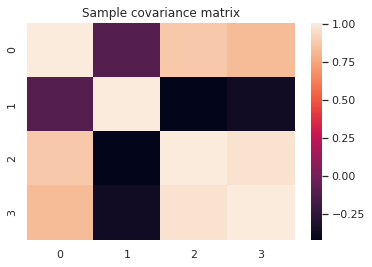

In [8]:
cm = np.cov (features_sc, rowvar = False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set ()

f = plt.figure ()
ax = f.add_subplot (111)
ax = sns.heatmap (cm)
plt.title ('Sample covariance matrix')
plt.show ()

It is observed that:
- the first feature is correlated with the third and fourth ones
- features 3 and 4 are highly correlated with each other, and negatively correlated with feature 1

Next, SVD is applied to the covariance matrix:

In [4]:
u, s, v = np.linalg.svd (cm)
print (u)
print (s)
print (v)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]
[[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


As expected, since the covariance matrix is symmetric and positive definite, the matrices $U$ and $V$ calculated by SVD satisfy $U = V^T$. The eigenvalues (returned in descending order) are $\{2.930, 0.927, 0.148, 0.021\}$.

As a next step, PCA is applied via scikit-learn's ```PCA``` class. After fitting the data in 2 components, the ```explained_variance_ratio_``` attribute is used to demonstrate the variance explained by the chosen components.

In [5]:
from sklearn.decomposition import PCA

pc = PCA (2)
features_red = pc.fit_transform (features_sc)
print (pc.explained_variance_ratio_)

[0.72770452 0.23030523]


It is thus evident that the 2 components can explain more than $95\%$ of the variance.

Last but not least, the transformed data are plotted.

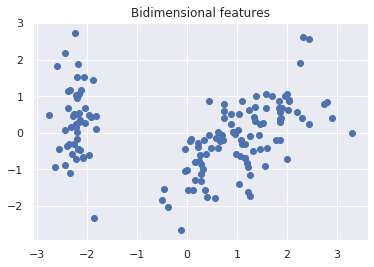

In [6]:
f2 = plt.figure ()
ax2 = f2.add_subplot (111)
ax2.scatter (features_red[:, 0], features_red[:, 1])
plt.title ('Bidimensional features')
plt.show ()

### Exercise 2.4

In order to accurately depict the given data and determine whether they are separable or not, the following code snippet was used:

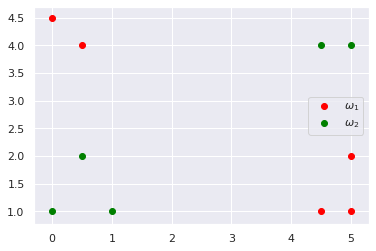

In [7]:
w_1 = np.array ([[4.5, 1], [5, 2], [5, 1], [0, 4.5], [0.5, 4]])
w_2 = np.array ([[0, 1], [0.5, 2], [5, 4], [4.5, 4], [1, 1]])

f3 = plt.figure ()
ax3 = f3.add_subplot (111)
ax3 = plt.scatter (w_1[:, 0], w_1[:, 1], color = 'red', label = '$\omega_1$')
ax3 = plt.scatter (w_2[:, 0], w_2[:, 1], color = 'green', label = '$\omega_2$')
plt.legend (loc = 'best')
plt.show ()

The data are not linearly separable. However, it can be seen that two linear boundaries and an AND-like layer are sufficient. 